In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
import scipy 
%matplotlib inline

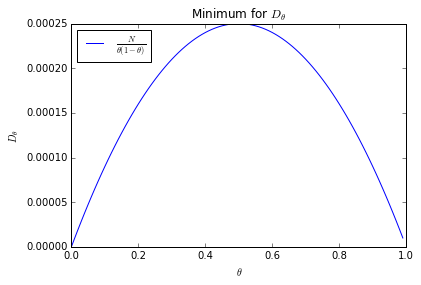

In [2]:
N = 10**3
bootstrepsNumber = 500
def minD(theta):
    return theta * (1 - theta) / N

thetas = np.arange(start=0, stop=1, step=0.01)

myFigure, myAxis = plt.subplots()
myAxis.plot(thetas, [minD(theta) for theta in thetas], label=r"$\frac{N}{\theta(1-\theta)}$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel(r"$\theta$")
myAxis.set_ylabel(r"$D_\theta$")
myAxis.set_title(r"Minimum for $D_\theta$")

По графику видно, что дисперсия может принимать большие значениях при $\theta$ близких середине отрезка $[0, 1]$, а при $\theta$ близких к крайним значениям, дисперсия уменшается.

In [3]:
evaluationsForEachTheta = []
for theta in thetas:
    sample = np.random.binomial(1, theta, N)
    evaluation = sample.sum() / sample.size

    evaluationsForTheta = []
    for k in range(bootstrepsNumber):
        evaluationsForTheta.append(np.random.binomial(1, evaluation, N).sum() / N)
    evaluationsForEachTheta.append(evaluationsForTheta)

In [4]:
def getS2(values):
    return sum([value ** 2 for value in values]) / len(values) - (sum([value for value in values]) / len(values)) ** 2

D = [getS2(evaluations) for evaluations in evaluationsForEachTheta]

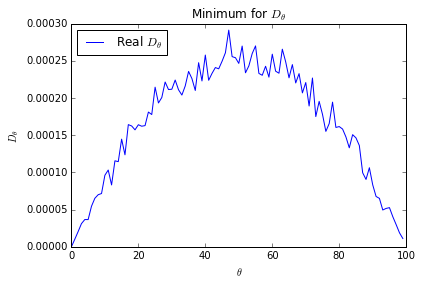

In [5]:
myFigure, myAxis = plt.subplots()
myAxis.plot(D, label=r"Real $D_\theta$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel(r"$\theta$")
myAxis.set_ylabel(r"$D_\theta$")
myAxis.set_title(r"Minimum for $D_\theta$")

Заметим, что график похож на теоритический